In [12]:
#Importing necessary libraries
import os
import pandas as pd
from dotenv import load_dotenv
import panel as pn
pn.extension('plotly')
import plotly.express as px
import hvplot.pandas
import matplotlib.pyplot as plt
import requests
import numpy as np
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
import seaborn as sns
from MCForecastTools import MCSimulation
%matplotlib inline

In [13]:
# Load .env enviroment variables
load_dotenv()

True

In [14]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")
type(alpaca_api_key)
#type(alpaca_secret_key)

str

In [15]:
# Create the Alpaca API object to pull in data sets
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [16]:
# Set start and end dates of ten years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2010-12-10', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2020-12-09', tz='America/New_York').isoformat()

In [17]:
tickers = ["AGG", "SPY", "IAU", "VNQ"]
# set timeframe
timeframe = "1D"
# get the data
port_df = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df
# Display sample data
port_df.tail()

AGG                                         IAU  \
                             open      high       low   close   volume   open   
time                                                                            
2020-12-03 00:00:00-05:00  117.92  117.9800  117.7650  117.91  5210910  17.54   
2020-12-04 00:00:00-05:00  117.90  117.9000  117.5133  117.58  4821820  17.57   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469  17.53   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353  17.85   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359  17.68   

                                                                   SPY  \
                              high     low   close      volume    open   
time                                                                     
2020-12-03 00:00:00-05:00  17.5700  17.381  17.560  17897467.0  366.68   
2020-12-04 00:00:00-05:00  17.6200  17.440  17.510  17363089.0  367.32   
2020-12-07 00:00:00-05:00  17.8189  17.530  17.780  17358926.0  369.02   
2020-12-08 00:00:00-05:00  17.8800  17.760  17.835  10585212.0  367.72   
2020-12-09 00:00:00-05:00  17.6900  17.405  17.530  18826525.0  370.88   

                                                                 VNQ           \
                             high     low     close    volume   open     high   
time                                                                            
2020-12-03 00:00:00-05:00  368.19  365.50  366.6698  52905586  84.60  85.5473   
2020-12-04 00:00:00-05:00  369.85  367.22  369.8300  40264568  85.49  86.4400   
2020-12-07 00:00:00-05:00  369.62  367.72  369.1200  40456544  86.21  86.4900   
2020-12-08 00:00:00-05:00  370.78  367.67  370.1599  32702217  85.29  85.8200   
2020-12-09 00:00:00-05:00  371.05  365.95  366.8900  60700254  85.55  85.6500   

                                                  
                             low  close   volume  
time                                              
2020-12-03 00:00:00-05:00  84.47  85.13  3116498  
2020-12-04 00:00:00-05:00  85.49  86.42  2996067  
2020-12-07 00:00:00-05:00  85.35  85.65  2572677  
2020-12-08 00:00:00-05:00  85.25  85.37  2548295  
2020-12-09 00:00:00-05:00  84.28  84.83  3863426

In [18]:
#check for nulls
port_df.isnull().mean()*100

AGG  open      0.00000
     high      0.00000
     low       0.00000
     close     0.00000
     volume    0.00000
IAU  open      0.07946
     high      0.07946
     low       0.07946
     close     0.07946
     volume    0.07946
SPY  open      0.00000
     high      0.00000
     low       0.00000
     close     0.00000
     volume    0.00000
VNQ  open      0.00000
     high      0.00000
     low       0.00000
     close     0.00000
     volume    0.00000
dtype: float64

In [19]:
port_df = port_df.dropna()
port_df.isnull().mean()*100

AGG  open      0.0
     high      0.0
     low       0.0
     close     0.0
     volume    0.0
IAU  open      0.0
     high      0.0
     low       0.0
     close     0.0
     volume    0.0
SPY  open      0.0
     high      0.0
     low       0.0
     close     0.0
     volume    0.0
VNQ  open      0.0
     high      0.0
     low       0.0
     close     0.0
     volume    0.0
dtype: float64

In [20]:
port_df.reset_index("time")
#sp500_df = sp500_df.drop(columns=['SPY'])
#sp500_df = sp500_df.drop(columns=['open', 'high', 'low', 'volume'])
port_df.tail()

AGG                                         IAU  \
                             open      high       low   close   volume   open   
time                                                                            
2020-12-03 00:00:00-05:00  117.92  117.9800  117.7650  117.91  5210910  17.54   
2020-12-04 00:00:00-05:00  117.90  117.9000  117.5133  117.58  4821820  17.57   
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469  17.53   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353  17.85   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359  17.68   

                                                                   SPY  \
                              high     low   close      volume    open   
time                                                                     
2020-12-03 00:00:00-05:00  17.5700  17.381  17.560  17897467.0  366.68   
2020-12-04 00:00:00-05:00  17.6200  17.440  17.510  17363089.0  367.32   
2020-12-07 00:00:00-05:00  17.8189  17.530  17.780  17358926.0  369.02   
2020-12-08 00:00:00-05:00  17.8800  17.760  17.835  10585212.0  367.72   
2020-12-09 00:00:00-05:00  17.6900  17.405  17.530  18826525.0  370.88   

                                                                 VNQ           \
                             high     low     close    volume   open     high   
time                                                                            
2020-12-03 00:00:00-05:00  368.19  365.50  366.6698  52905586  84.60  85.5473   
2020-12-04 00:00:00-05:00  369.85  367.22  369.8300  40264568  85.49  86.4400   
2020-12-07 00:00:00-05:00  369.62  367.72  369.1200  40456544  86.21  86.4900   
2020-12-08 00:00:00-05:00  370.78  367.67  370.1599  32702217  85.29  85.8200   
2020-12-09 00:00:00-05:00  371.05  365.95  366.8900  60700254  85.55  85.6500   

                                                  
                             low  close   volume  
time                                              
2020-12-03 00:00:00-05:00  84.47  85.13  3116498  
2020-12-04 00:00:00-05:00  85.49  86.42  2996067  
2020-12-07 00:00:00-05:00  85.35  85.65  2572677  
2020-12-08 00:00:00-05:00  85.25  85.37  2548295  
2020-12-09 00:00:00-05:00  84.28  84.83  3863426

In [21]:
# create dataframe for bonds
bond_prices = pd.DataFrame()
bond_prices["AGG"] = port_df["AGG"]["close"]
bond_prices.tail()

,AGG
time,
2020-12-03 00:00:00-05:00,117.91
2020-12-04 00:00:00-05:00,117.58
2020-12-07 00:00:00-05:00,117.75
2020-12-08 00:00:00-05:00,117.77
2020-12-09 00:00:00-05:00,117.62


In [22]:
# create dataframe for S&P 500
sp500_prices = pd.DataFrame()
sp500_prices["SPY"] = port_df["SPY"]["close"]
sp500_prices.tail()

,SPY
time,
2020-12-03 00:00:00-05:00,366.6698
2020-12-04 00:00:00-05:00,369.8300
2020-12-07 00:00:00-05:00,369.1200
2020-12-08 00:00:00-05:00,370.1599
2020-12-09 00:00:00-05:00,366.8900


In [23]:
# create dataframe for Gold ETF
gold_prices = pd.DataFrame()
gold_prices["IAU"] = port_df["IAU"]["close"]
gold_prices.tail()

,IAU
time,
2020-12-03 00:00:00-05:00,17.560
2020-12-04 00:00:00-05:00,17.510
2020-12-07 00:00:00-05:00,17.780
2020-12-08 00:00:00-05:00,17.835
2020-12-09 00:00:00-05:00,17.530


In [24]:
# create dataframe for Real Estate Investment Trust
real_estate_prices = pd.DataFrame()
real_estate_prices["VNQ"] = port_df["VNQ"]["close"]
real_estate_prices.tail()

,VNQ
time,
2020-12-03 00:00:00-05:00,85.13
2020-12-04 00:00:00-05:00,86.42
2020-12-07 00:00:00-05:00,85.65
2020-12-08 00:00:00-05:00,85.37
2020-12-09 00:00:00-05:00,84.83


In [25]:
#calculate the daily returns

bond_returns = bond_prices.pct_change().dropna()
sp500_returns = sp500_prices.pct_change().dropna()
gold_returns = gold_prices.pct_change().dropna()
real_estate_returns = real_estate_prices.pct_change().dropna()

In [26]:
bond_returns.hvplot()

:Curve   [time]   (AGG)

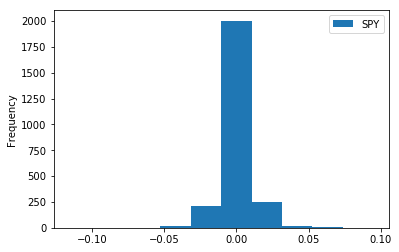

In [27]:
sp500_returns.plot.hist()

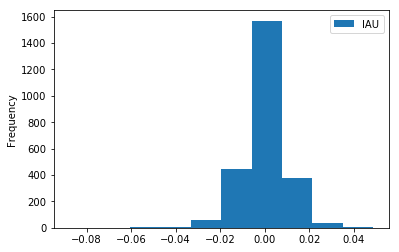

In [28]:
gold_returns.plot.hist()

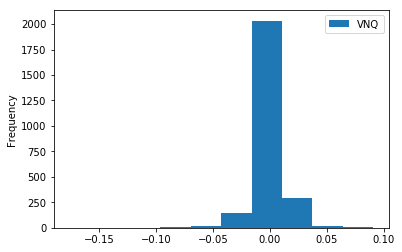

In [29]:
real_estate_returns.plot.hist()

In [30]:
# Calculate and plot BOND cumulative returns
bond_cumulative_returns = (1 + bond_returns).cumprod()
bond_cumulative_returns.head()
bond_cumulative_returns.hvplot(title="Bond Fund Last 10 Years of Cumulative Returns")

:Curve   [time]   (AGG)

In [31]:
# Calculate and plot S&P 500 cumulative returns
sp500_cumulative_returns = (1 + sp500_returns).cumprod()
sp500_cumulative_returns.head()
sp500_cumulative_returns.hvplot(title="S&P 500 Last 10 Years of Cumulative Returns")


:Curve   [time]   (SPY)

In [32]:
# Calculate and plot GOLD ETF cumulative returns
gold_cumulative_returns = (1 + gold_returns).cumprod()
gold_cumulative_returns.head()
gold_cumulative_returns.hvplot(title="Gold ETF Last 10 Years of Cumulative Returns")

:Curve   [time]   (IAU)

In [34]:
# Calculate and plot Real Estate Investment Trust cumulative returns
REIT_cumulative_returns = (1 + real_estate_returns).cumprod()
REIT_cumulative_returns.head()
REIT_cumulative_returns.hvplot(title="Real Estate Investment Trust Last 10 Years of Cumulative Returns")

:Curve   [time]   (VNQ)

In [45]:
# Combine cumulative return dataframs into single dataframe
cumulative_returns_combined = pd.concat([bond_cumulative_returns, sp500_cumulative_returns, gold_cumulative_returns, REIT_cumulative_returns], axis=1)
cumulative_returns_combined.head()

,AGG,SPY,IAU,VNQ
time,,,,
2010-12-13 00:00:00-05:00,1.000950,1.000321,1.004425,1.001667
2010-12-14 00:00:00-05:00,0.995156,1.001124,1.005162,0.991111
2010-12-15 00:00:00-05:00,0.993257,0.996707,0.994838,0.980556
2010-12-16 00:00:00-05:00,0.995536,1.002249,0.988201,0.983148
2010-12-17 00:00:00-05:00,1.000665,0.998635,0.990413,0.991852


In [46]:
cumulative_returns_combined.hvplot()

:NdOverlay   [Variable]
   :Curve   [time]   (value)

In [44]:
# Export combined data frame to csv file
cumulative_returns_combined.to_csv(r'..\project_1\returns_df.csv', header=True)

In [58]:
# finally, calculate standard deviation for each (Bonds)
bond_std = bond_returns.std()
bond_annualized_risk = bond_std * np.sqrt(252)
bond_annualized_risk

AGG    0.041556
dtype: float64

<AxesSubplot:title={'center':'Bonds Rolling 21 Day Standard Deviation'}, xlabel='time'>

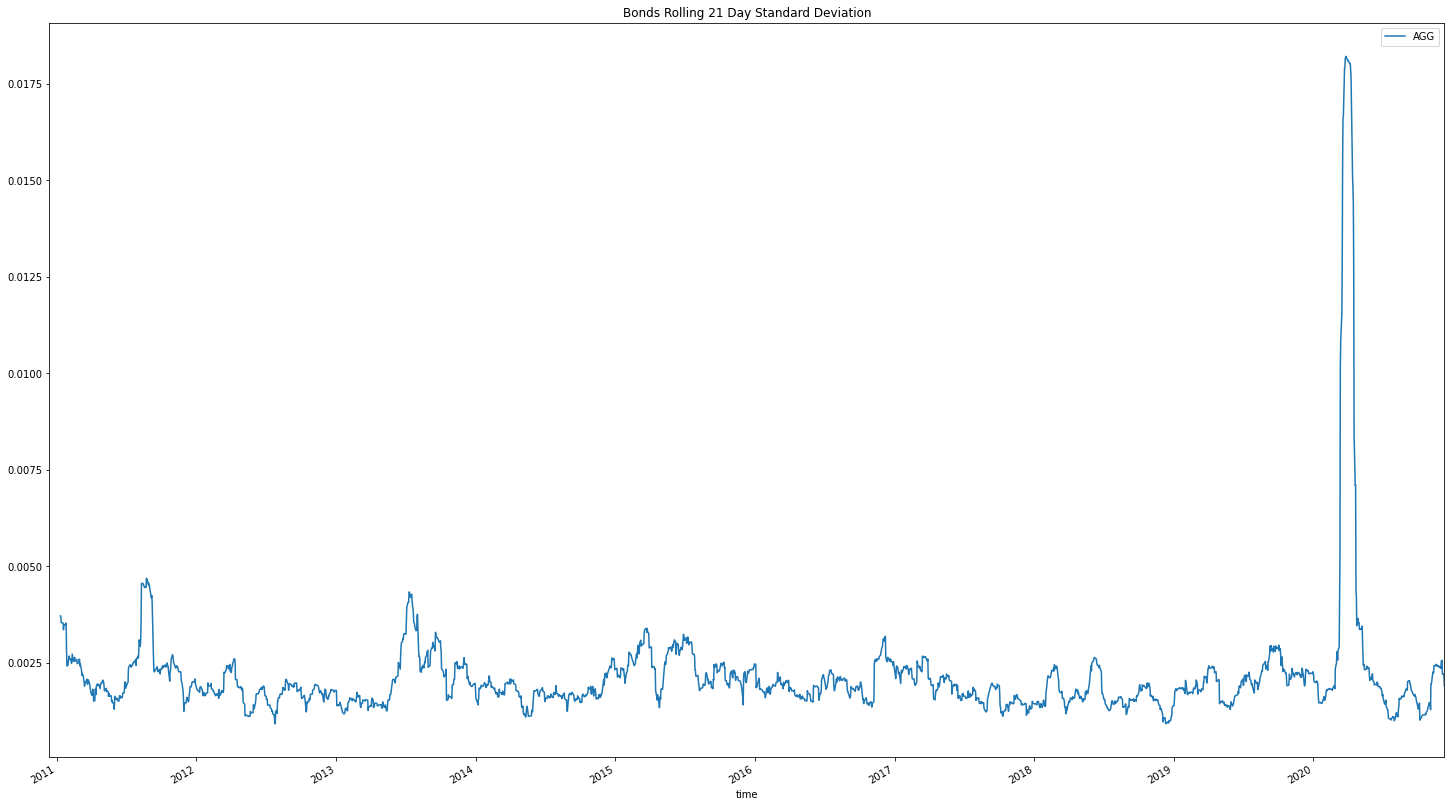

In [59]:
# plot rolling standard deviation for each (Bonds)
bond_returns.rolling(window=21).std().plot(figsize=(25,15),title="Bonds Rolling 21 Day Standard Deviation")

In [56]:
# finally, calculate standard deviation for each (S&P)
sp500_std = sp500_returns.std()
sp500_annualized_risk = sp500_std * np.sqrt(252)
sp500_annualized_risk

SPY    0.173811
dtype: float64

<AxesSubplot:title={'center':'S&P 500 Rolling 21 Day Standard Deviation'}, xlabel='time'>

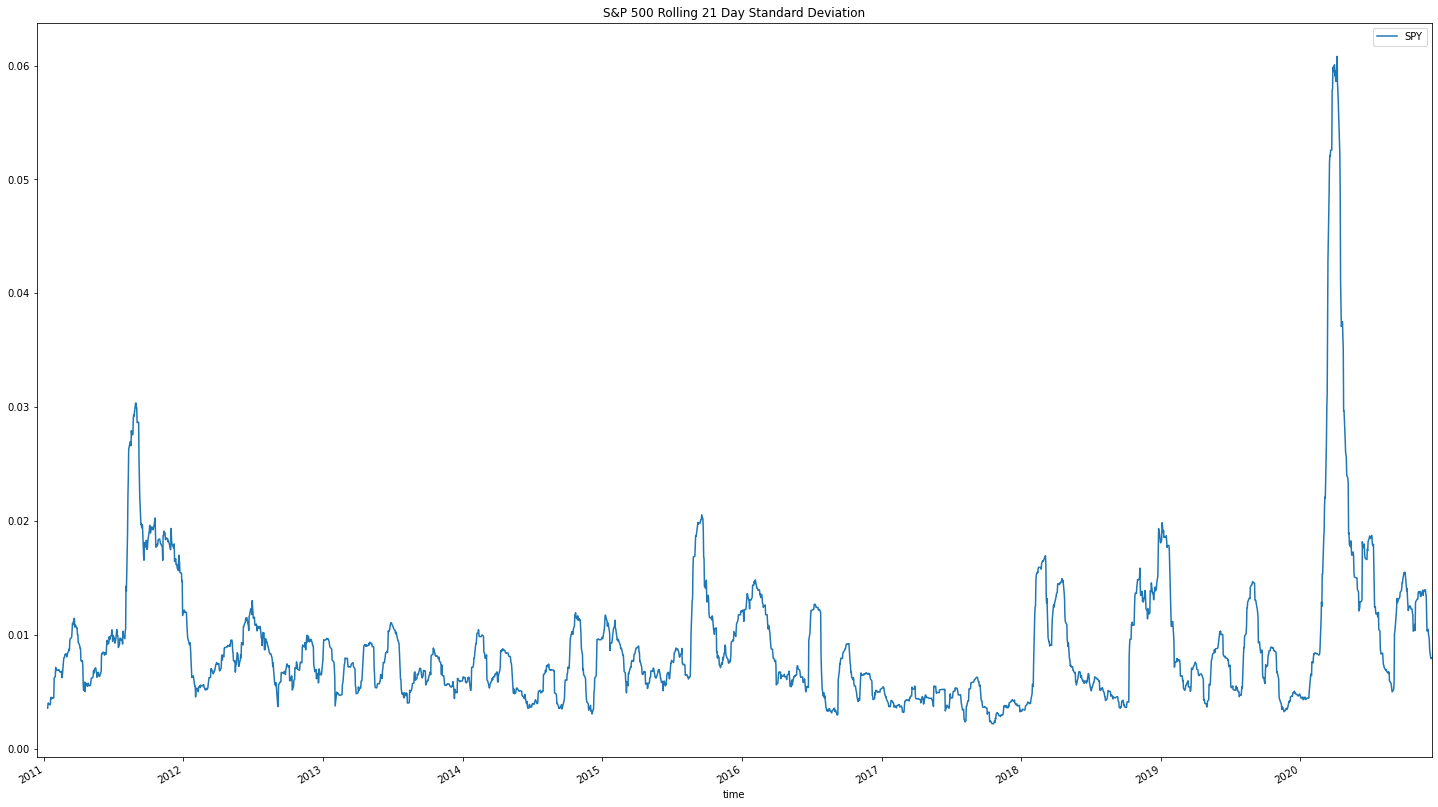

In [57]:
# plot rolling standard deviation for each (S&P)
sp500_returns.rolling(window=21).std().plot(figsize=(25,15),title="S&P 500 Rolling 21 Day Standard Deviation")

In [60]:
# finally, calculate standard deviation for each (Gold)
gold_std = gold_returns.std()
gold_annualized_risk = gold_std * np.sqrt(252)
gold_annualized_risk

IAU    0.158244
dtype: float64

<AxesSubplot:title={'center':'Gold ETF Rolling 21 Day Standard Deviation'}, xlabel='time'>

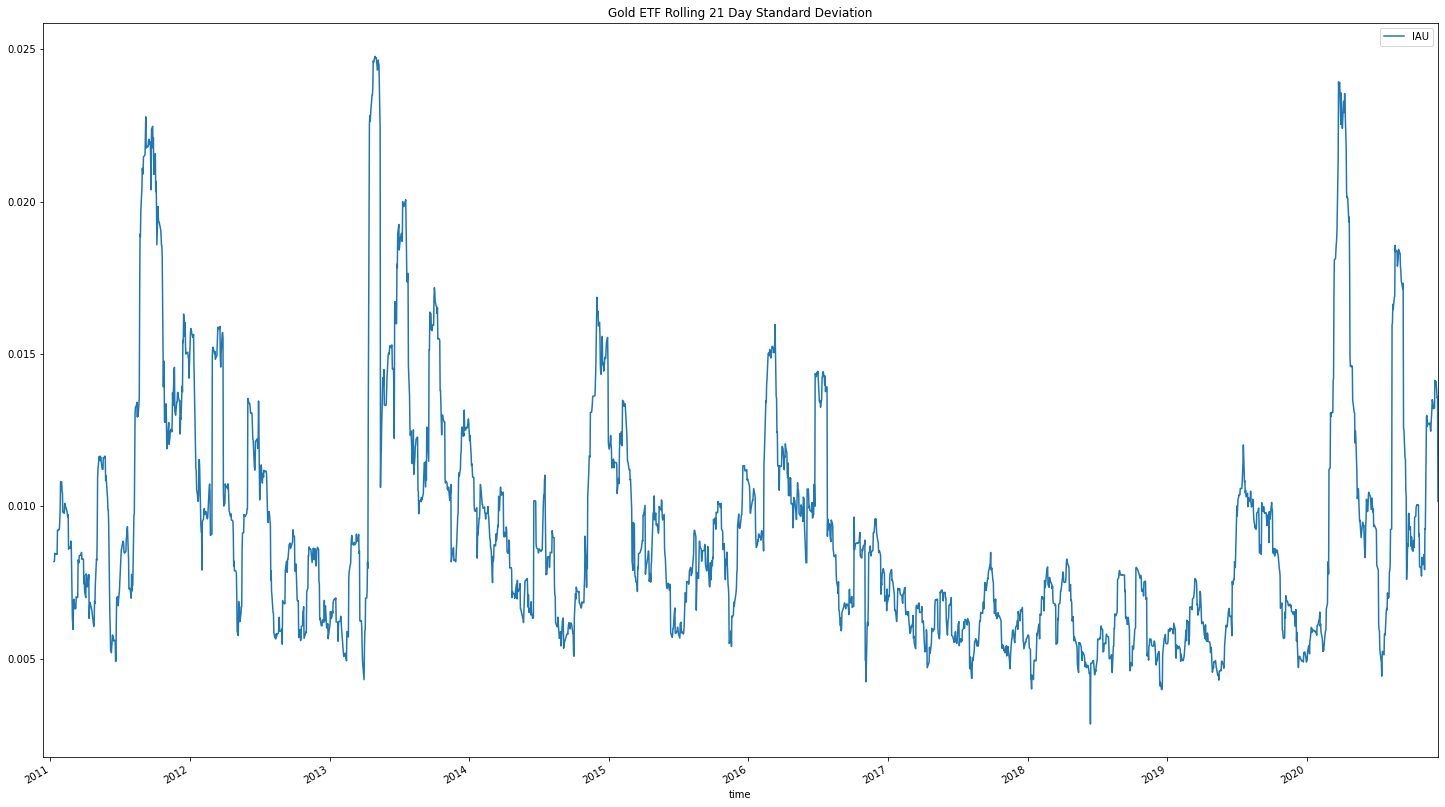

In [61]:
# plot rolling standard deviation for each (Gold)
gold_returns.rolling(window=21).std().plot(figsize=(25,15),title="Gold ETF Rolling 21 Day Standard Deviation")

In [62]:
# finally, calculate standard deviation for each (Real Estate)
real_estate_std = real_estate_returns.std()
real_estate_annualized_risk = real_estate_std * np.sqrt(252)
real_estate_annualized_risk

VNQ    0.205931
dtype: float64

<AxesSubplot:title={'center':'REIT Rolling 21 Day Standard Deviation'}, xlabel='time'>

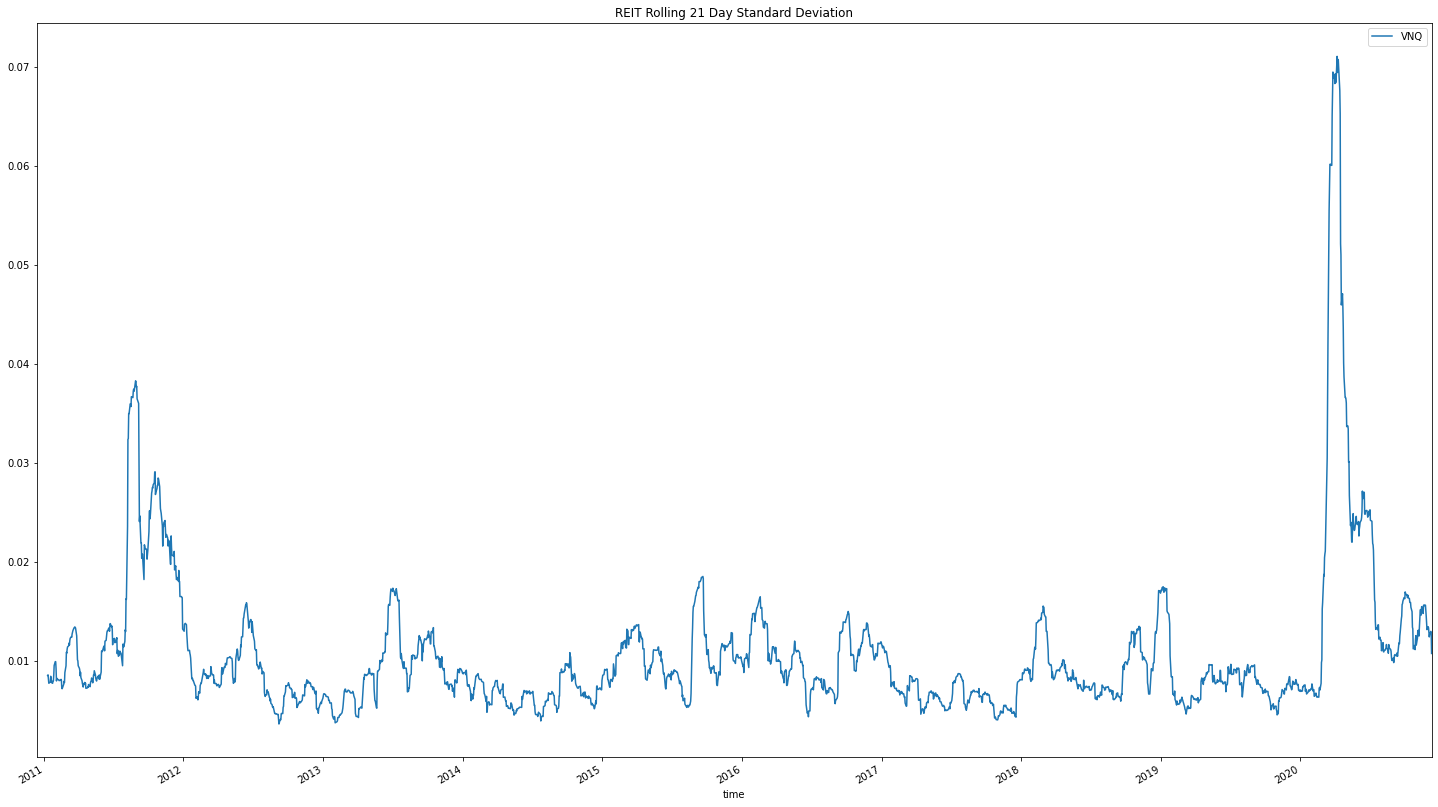

In [64]:
# plot rolling standard deviation for each (Real Estate)
real_estate_returns.rolling(window=21).std().plot(figsize=(25,15),title="REIT Rolling 21 Day Standard Deviation")